<a href="https://colab.research.google.com/github/DS3001/group3/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
! git clone https://github.com/DS3001/group3.git

fatal: destination path 'group3' already exists and is not an empty directory.


**Data**

In [116]:
import pandas as pd
import numpy as np

df_train = pd.read_csv('./group3/project_2/data/training_data.csv')
df_test = pd.read_csv('./group3/project_2/data/testing_data.csv')
df_train = df_train.drop(['ever_married', 'id', 'Unnamed: 0'], axis=1)
df_test = df_test.drop(['ever_married', 'id', 'Unnamed: 0'], axis=1)

y_train = df_train['stroke']
X_train = df_train.drop('stroke',axis=1)
y_test = df_test['stroke']
X_test = df_test.drop('stroke',axis=1)

X_train['bmi'] = X_train['bmi'].fillna(X_train['bmi'].mean())
X_test['bmi'] = X_test['bmi'].fillna(X_test['bmi'].mean())
X_train.loc[X_train['gender']=='Other','gender'] = 'Male'


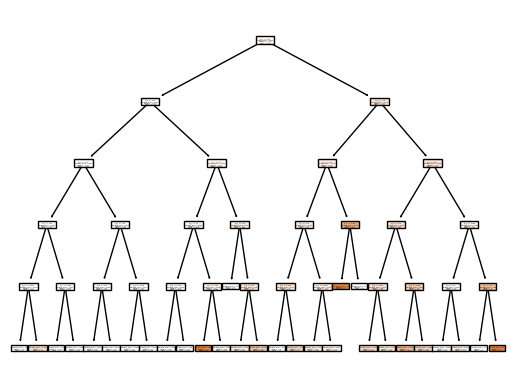

R-squared (R2): 0.017003429897117228
Root Mean Squared Error (RMSE): 0.21376755493816021


In [118]:
#Tree Model
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# X_train = X_train.loc[:,['stroke'] ]
# X_test = X_test.loc[:,['stroke'] ]

continuous = X_train[['bmi','age']]
continuous_test = X_test[['bmi','age']]


X_train = pd.get_dummies(X_train[['hypertension','heart_disease',]])
X_test = pd.get_dummies(X_test[['hypertension','heart_disease']])

X_train = pd.concat([continuous,X_train],axis=1)
X_test = pd.concat([continuous_test,X_test],axis=1)


y_train = df_train['stroke']

model = tree.DecisionTreeRegressor(max_depth=5)
cart = model.fit(X_train, y_train)

# Plot the tree
tree.plot_tree(cart, filled=True)
plt.show()

# Make predictions on the test set
y_pred = cart.predict(X_test)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("R-squared (R2):", r2)
print("Root Mean Squared Error (RMSE):", rmse)



In [ ]:
## Linear Model
from sklearn.linear_model import LinearRegression # Import linear regression model
from sklearn.preprocessing import PolynomialFeatures

X_train_numeric = X_train.loc[:,['age','hypertension','heart_disease','bmi','avg_glucose_level'] ]
#
expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z = expander.fit_transform(X_train_numeric) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
continuous = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
#
dummies = pd.concat([ pd.get_dummies(X_train['work_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_train['Residence_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_train['smoking_status'],dtype='int',drop_first=True)],axis=1)

#
Z_train = pd.concat([continuous,dummies],axis=1)

X_test_numeric = X_test.loc[:,['age','hypertension','heart_disease','bmi','avg_glucose_level'] ]
#
expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z = expander.fit_transform(X_test_numeric) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
continuous = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe

dummies = pd.concat([ pd.get_dummies(X_test['work_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_test['Residence_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_test['smoking_status'],dtype='int',drop_first=True)],axis=1)
#
Z_test = pd.concat([continuous,dummies],axis=1)

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(Z_train, y_train) # Fit the linear model
print('R2: ', reg.score(Z_test, y_test)) # R squared measure
y_hat = reg.predict(Z_test)
N = len(y_test)
print('RMSE: ', (np.sum( (y_test - y_hat)**2)/N )**.5 )   # R squared measure